<a href="https://colab.research.google.com/github/flynn-t2/Colab_Repository/blob/main/Kaggle_HR_Analytics_on_Employee_Attrition_and_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
  # Getting the Current working directory
import os
os.getcwd()

'/content'

In [ ]:
# Changing the Current working directory to access imported data files
# Data Source: Kaggle :: Mahmoud Emad Abdallah
path = "/content/HR_Analytics_Employee_Attrition_Performance_Dataset"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
print(dir_list)


Files and directories in ' /content/HR_Analytics_Employee_Attrition_Performance_Dataset ' :
['EducationLevel.csv', 'Employee.csv', 'PerformanceRating.csv', 'RatingLevel.csv', 'SatisfiedLevel.csv']


In [ ]:
# prompt: draft out code to for python function to achieve steps as below:
# - default "/content/HR_Analytics_Employee_Attrition_Performance_Dataset" as default folder path
# - change directory to the default folder path

import os

def list_files_in_directory(folder_path="/content/HR_Analytics_Employee_Attrition_Performance_Dataset"):
    """
    Changes the current working directory to the specified folder path,
    lists the files in that directory, and returns the list of files.

    Args:
        folder_path: The path to the folder. Defaults to
                     "/content/HR_Analytics_Employee_Attrition_Performance_Dataset".

    Returns:
        A list of file names in the directory, or None if the directory
        does not exist or an error occurs.
    """
    try:
        os.chdir(folder_path)  # Change the current working directory
        print(f"Current working directory changed to: {os.getcwd()}")

        files = os.listdir() # List files in the current working directory

        print("Files in the directory:")
        for file in files:
          print(file)
        return files

    except FileNotFoundError:
        print(f"Error: Directory '{folder_path}' not found.")
        return None

    except OSError as e:
        print(f"An error occurred: {e}")
        return None


In [ ]:
# prompt:  list down available files stored inside the folder for further accessibility and transform them into respective pandas data frame using their lower case 'file name' as name of variables that start with 'df_'

def process_files(folder_path):
    """Lists files in a folder and creates pandas DataFrames."""
    try:
        os.chdir(folder_path)
        files = [f for f in os.listdir() if os.path.isfile(f)]
        for file in files:
            try:
                # Construct variable name dynamically
                var_name = f"df_{file.lower().replace(' ', '_').replace('.csv', '')}"
                # Create DataFrame
                globals()[var_name] = pd.read_csv(file)
                print(f"DataFrame '{var_name}' created successfully.")
            except pd.errors.ParserError:
                print(f"Error: Could not parse file '{file}' as a CSV.")
            except Exception as e:
                print(f"Error processing file '{file}': {e}")

    except FileNotFoundError:
        print(f"Error: Directory '{folder_path}' not found.")
    except OSError as e:
        print(f"An error occurred: {e}")


# Example usage
folder_path = "/content/HR_Analytics_Employee_Attrition_Performance_Dataset"
process_files(folder_path)

DataFrame 'df_educationlevel' created successfully.
DataFrame 'df_employee' created successfully.
DataFrame 'df_performancerating' created successfully.
DataFrame 'df_ratinglevel' created successfully.
DataFrame 'df_satisfiedlevel' created successfully.


In [ ]:
# access first 5 records of the accessible data frame
print("first 5 rows of records from performance rating dataset")
df_performancerating.head()

first 5 rows of records from performance rating dataset


,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3


In [ ]:
df_performancerating_column_names = df_performancerating.columns
print(df_performancerating_column_names)

Index(['PerformanceID', 'EmployeeID', 'ReviewDate', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'RelationshipSatisfaction',
       'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken',
       'WorkLifeBalance', 'SelfRating', 'ManagerRating'],
      dtype='object')


In [ ]:
df_performancerating.describe()

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
count,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000
mean,3.872559,3.430616,3.427336,2.012968,1.017290,3.414667,3.984051,3.473394
std,0.940701,1.152565,1.156753,0.820310,0.950316,1.143961,0.816432,0.961738
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000
25%,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,3.000000,3.000000
50%,4.000000,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,3.000000
75%,5.000000,4.000000,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000


In [ ]:
print("first 5 rows of records from rating dataset")
df_ratinglevel.head()

first 5 rows of records from rating dataset


,RatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond


In [ ]:
print("first 5 rows of records from satisfaction level dataset")
df_satisfiedlevel.head()

first 5 rows of records from satisfaction level dataset


,SatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


In [ ]:
df_educationlevel.head()

,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate


In [ ]:
print("first 5 rows of records from employee dataset")
df_employee.head()

first 5 rows of records from employee dataset


,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


In [ ]:
df_employee_column_names = df_employee.columns
print(df_employee_column_names)

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
df_employee.describe(include = "all")

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470,1470,1470,1470,1470.000000,1470,1470,1470.000000,1470,1470,...,1470,1470.000000,1470.000000,1470,1470,1470,1470.000000,1470.000000,1470.000000,1470.000000
unique,1470,1334,1441,4,NaN,3,3,NaN,3,7,...,3,NaN,NaN,2,1192,2,NaN,NaN,NaN,NaN
top,3012-1A41,Murdock,Ponten,Female,NaN,Some Travel,Technology,NaN,CA,White,...,Married,NaN,NaN,No,2016-10-04,No,NaN,NaN,NaN,NaN
freq,1,3,2,675,NaN,1043,961,NaN,875,860,...,624,NaN,NaN,1054,4,1233,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,28.989796,NaN,NaN,22.502721,NaN,NaN,...,NaN,112956.497959,0.793878,NaN,NaN,NaN,4.562585,2.293197,3.440816,2.239456
std,NaN,NaN,NaN,NaN,7.993055,NaN,NaN,12.811124,NaN,NaN,...,NaN,103342.889222,0.852077,NaN,NaN,NaN,3.288048,2.539093,2.945194,2.505774
min,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,20387.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,12.000000,NaN,NaN,...,NaN,43580.500000,0.000000,NaN,NaN,NaN,2.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,22.000000,NaN,NaN,...,NaN,71199.500000,1.000000,NaN,NaN,NaN,4.000000,1.000000,3.000000,1.000000
75%,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,33.000000,NaN,NaN,...,NaN,142055.750000,1.000000,NaN,NaN,NaN,7.000000,4.000000,6.000000,4.000000


In [ ]:
# Count unique values in 'height' column using unique()
n = len(pd.unique(df_employee['Attrition']))

print("Number of unique values in 'df_employee':", n)

Number of unique values in 'df_employee': 2


In [ ]:
# Count unique values in 'height' column using unique()
n = len(pd.unique(df_performancerating['EmployeeID']))

print("Number of unique values in 'df_performancerating':", n)

Number of unique values in 'df_performancerating': 1280


In [ ]:
# Count unique values in 'height' column using unique()
n = len(pd.unique(df_employee['EmployeeID']))

print("Number of unique values in 'df_employee':", n)

Number of unique values in 'df_employee': 1470


It's discovered that not all employees from df_employee dataframe underwent employee attrition and performance rating; thus, those unavailable employees are assumed to be not serving this hiring firms anymore.

In [ ]:
print("first 5 rows of records from education level dataset")
df_educationlevel.head()

first 5 rows of records from education level dataset


,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate


In [ ]:
# Merge DataFrames on the 'ID' column using an inner join
merged_df = pd.merge(df_performancerating, df_employee, on='EmployeeID', how='inner')
merged_df.head(25)

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,...,Married,58993,1,Yes,2014-11-07,Yes,7,2,7,1
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,...,Married,23547,0,No,2015-01-13,Yes,3,0,2,1
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,...,Divorced,57698,2,Yes,2015-05-11,Yes,6,5,6,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,...,Single,49374,0,Yes,2014-04-02,Yes,1,0,0,1
5,PR06,F93E-BDEF,1/4/2013,3,3,2,2,0,4,4,...,Single,130848,0,Yes,2014-02-09,No,8,8,8,8
6,PR07,9E7A-1F70,1/8/2013,3,4,5,2,1,5,4,...,Single,129356,0,No,2012-05-02,Yes,5,1,1,2
7,PR08,05ED-92F1,1/10/2013,4,5,4,1,1,3,3,...,Single,28984,0,Yes,2016-10-10,Yes,3,1,1,0
8,PR09,F72D-261D,1/10/2013,4,5,2,1,1,4,5,...,Single,76133,0,Yes,2014-01-06,Yes,1,0,1,0
9,PR10,774E-685D,1/11/2013,5,4,3,2,3,4,5,...,Single,148862,0,Yes,2013-11-03,Yes,2,0,1,1


Data merging successful, without additional rows of data created in the dataframe. In order to proceed further, irrelevant columns / attributes will be removed for further analytical study.

In [ ]:
# merged_df.describe(include='all')
merged_df.describe()

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000
mean,3.872559,3.430616,3.427336,2.012968,1.017290,3.414667,3.984051,3.473394,30.776718,22.301535,2.860486,111061.747951,0.722015,5.727083,2.852884,4.254136,2.814577
std,0.940701,1.152565,1.156753,0.820310,0.950316,1.143961,0.816432,0.961738,7.928774,12.896953,1.028617,98267.955572,0.838703,3.338471,2.813943,3.179384,2.796340
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000,18.000000,1.000000,1.000000,20387.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,3.000000,3.000000,25.000000,12.000000,2.000000,45276.000000,0.000000,3.000000,0.000000,1.000000,0.000000
50%,4.000000,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,3.000000,28.000000,22.000000,3.000000,75667.000000,1.000000,6.000000,2.000000,4.000000,2.000000
75%,5.000000,4.000000,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000,37.000000,33.000000,4.000000,137427.000000,1.000000,9.000000,5.000000,7.000000,5.000000
max,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000,51.000000,45.000000,5.000000,547204.000000,3.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
merged_df_column_names = merged_df.columns
print(merged_df_column_names)
# OR
# list(merged_df)

Index(['PerformanceID', 'EmployeeID', 'ReviewDate', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'RelationshipSatisfaction',
       'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken',
       'WorkLifeBalance', 'SelfRating', 'ManagerRating', 'FirstName',
       'LastName', 'Gender', 'Age', 'BusinessTravel', 'Department',
       'DistanceFromHome (KM)', 'State', 'Ethnicity', 'Education',
       'EducationField', 'JobRole', 'MaritalStatus', 'Salary',
       'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
merged_df.describe()

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000
mean,3.872559,3.430616,3.427336,2.012968,1.017290,3.414667,3.984051,3.473394,30.776718,22.301535,2.860486,111061.747951,0.722015,5.727083,2.852884,4.254136,2.814577
std,0.940701,1.152565,1.156753,0.820310,0.950316,1.143961,0.816432,0.961738,7.928774,12.896953,1.028617,98267.955572,0.838703,3.338471,2.813943,3.179384,2.796340
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000,18.000000,1.000000,1.000000,20387.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,3.000000,3.000000,25.000000,12.000000,2.000000,45276.000000,0.000000,3.000000,0.000000,1.000000,0.000000
50%,4.000000,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,3.000000,28.000000,22.000000,3.000000,75667.000000,1.000000,6.000000,2.000000,4.000000,2.000000
75%,5.000000,4.000000,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000,37.000000,33.000000,4.000000,137427.000000,1.000000,9.000000,5.000000,7.000000,5.000000
max,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000,51.000000,45.000000,5.000000,547204.000000,3.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
processed_df = merged_df.drop(['PerformanceID','EmployeeID','ReviewDate', 'FirstName', 'LastName'], axis=1)
processed_df.head()

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,Gender,Age,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,5,4,5,1,0,4,4,4,Non-Binary,27,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
1,5,4,4,1,3,4,4,3,Male,28,...,Married,58993,1,Yes,2014-11-07,Yes,7,2,7,1
2,3,4,5,3,2,3,5,4,Female,25,...,Married,23547,0,No,2015-01-13,Yes,3,0,2,1
3,5,3,2,2,0,2,3,2,Male,25,...,Divorced,57698,2,Yes,2015-05-11,Yes,6,5,6,2
4,5,2,3,1,0,4,4,3,Female,27,...,Single,49374,0,Yes,2014-04-02,Yes,1,0,0,1


In [ ]:
processed_df_column_name = processed_df.columns
print(processed_df_column_name)

Index(['EnvironmentSatisfaction', 'JobSatisfaction',
       'RelationshipSatisfaction', 'TrainingOpportunitiesWithinYear',
       'TrainingOpportunitiesTaken', 'WorkLifeBalance', 'SelfRating',
       'ManagerRating', 'Gender', 'Age', 'BusinessTravel', 'Department',
       'DistanceFromHome (KM)', 'State', 'Ethnicity', 'Education',
       'EducationField', 'JobRole', 'MaritalStatus', 'Salary',
       'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
processed_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   EnvironmentSatisfaction          6709 non-null   int64 
 1   JobSatisfaction                  6709 non-null   int64 
 2   RelationshipSatisfaction         6709 non-null   int64 
 3   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 4   TrainingOpportunitiesTaken       6709 non-null   int64 
 5   WorkLifeBalance                  6709 non-null   int64 
 6   SelfRating                       6709 non-null   int64 
 7   ManagerRating                    6709 non-null   int64 
 8   Gender                           6709 non-null   object
 9   Age                              6709 non-null   int64 
 10  BusinessTravel                   6709 non-null   object
 11  Department                       6709 non-null   object
 12  DistanceFromHome (KM)            6

In [ ]:
# convert defined variable list into object or string

categorical_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'TrainingOpportunitiesWithinYear',
                    'TrainingOpportunitiesTaken', 'StockOptionLevel', 'YearsAtCompany', 'YearsInMostRecentRole',
                    'YearsSinceLastPromotion', 'YearsWithCurrManager', 'WorkLifeBalance', 'SelfRating',
                    'ManagerRating','Gender', 'BusinessTravel', 'Department', 'State',
                    'Ethnicity', 'Education', 'EducationField', 'JobRole',
                    'MaritalStatus', 'OverTime', 'Attrition']

for col in categorical_cols:
    processed_df[col] = processed_df[col].astype('category')

In [ ]:
# convert defined variable list into datatime data type
processed_df['HireDate'] = pd.to_datetime(processed_df['HireDate'])
processed_df['HireDate'].head()

,HireDate
0,2013-12-14
1,2014-11-07
2,2015-01-13
3,2015-05-11
4,2014-04-02


In [ ]:
processed_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EnvironmentSatisfaction          6709 non-null   category      
 1   JobSatisfaction                  6709 non-null   category      
 2   RelationshipSatisfaction         6709 non-null   category      
 3   TrainingOpportunitiesWithinYear  6709 non-null   category      
 4   TrainingOpportunitiesTaken       6709 non-null   category      
 5   WorkLifeBalance                  6709 non-null   category      
 6   SelfRating                       6709 non-null   category      
 7   ManagerRating                    6709 non-null   category      
 8   Gender                           6709 non-null   category      
 9   Age                              6709 non-null   int64         
 10  BusinessTravel                   6709 non-null   category   

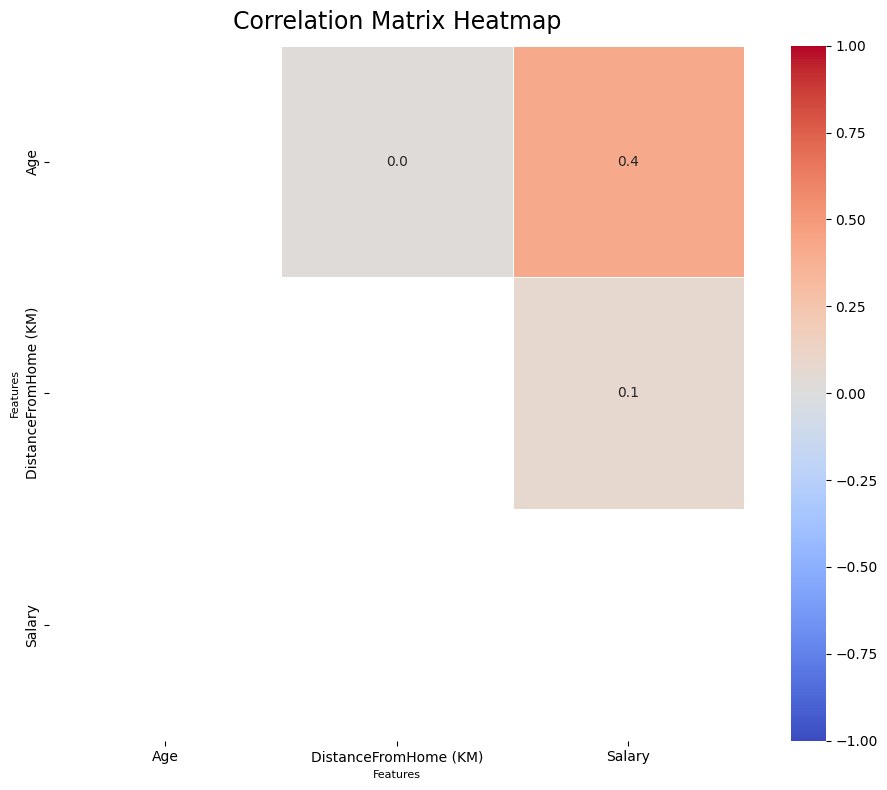

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix on numeric columns
corr = processed_df.select_dtypes('number').corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a mask that covers the lower triangle of the correlation matrix
mask = np.tril(np.ones_like(corr, dtype=bool))

# Plot the heatmap with better labels and annotations
sns.heatmap(
    corr,
    annot=True,  # Annotate cells with the correlation values
    fmt=".1f",   # Format for the annotation (1 decimal places)
    cmap="coolwarm",  # Color palette for better visualization
    square=True,
    center = 0,
    vmin = -1,
    vmax = 1,
    cbar=True,   # Include a color bar
    linewidths=0.5,  # Add lines between cells for clarity
    ax=ax,        # Use the pre-defined axis
    mask=mask
)

# Add axis labels and title for better context
ax.set_title("Correlation Matrix Heatmap", fontsize=17, pad=12)
ax.set_xlabel("Features", fontsize=8)
ax.set_ylabel("Features", fontsize=8)

# Adjust the layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


It's detected that age and salary is showing moderate positive correlation.

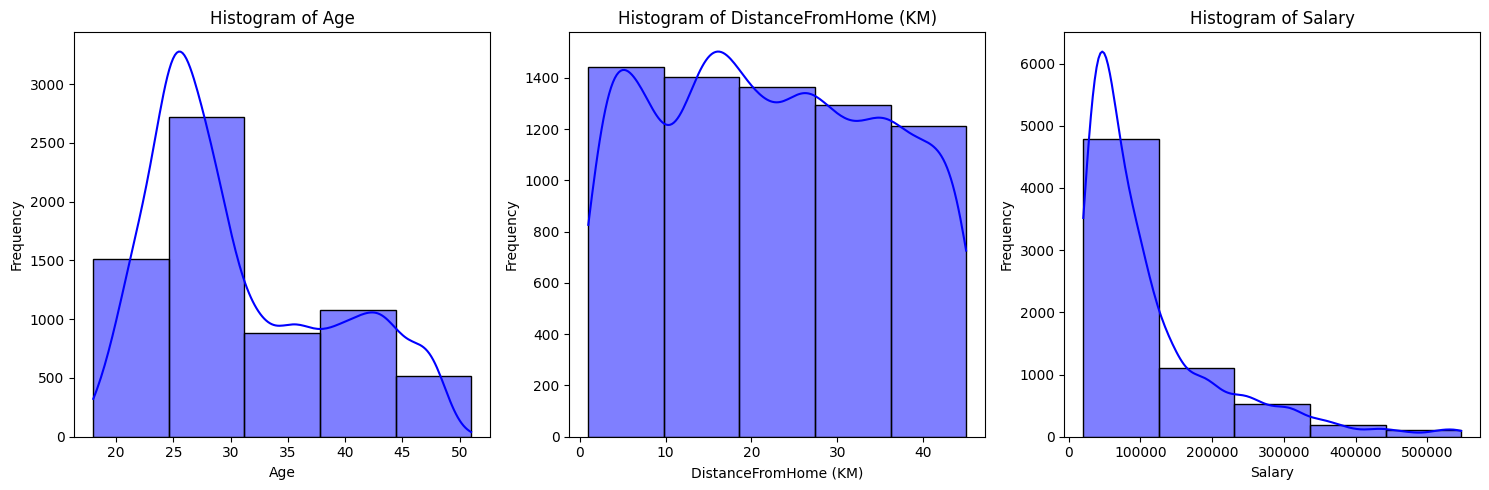

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multiple_histograms(df, columns, bins=10):
    """
    Plots multiple histograms for the specified columns in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    columns (list of str): List of column names to plot histograms for.
    bins (int): Number of bins for the histograms (default is 10).
    """
    # Calculate the number of rows and columns for subplots
    num_columns = len(columns)
    ncols = 3  # Number of columns in the grid
    nrows = (num_columns // ncols) + (num_columns % ncols > 0)  # Determine rows dynamically

    # Create the subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
    axes = axes.flatten()  # Flatten to easily iterate over the axes

    for i, column in enumerate(columns):
        sns.histplot(
            df[column],
            bins=bins,
            kde=True,  # Add KDE for visualization of distribution
            ax=axes[i],
            color="blue"
        )
        axes[i].set_title(f'Histogram of {column}', fontsize=12)
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    # Remove unused subplots if any
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()


# Columns to plot
numerical_cols = ['Age', 'DistanceFromHome (KM)', 'Salary']

# Call the function
plot_multiple_histograms(processed_df, numerical_cols, bins=5)


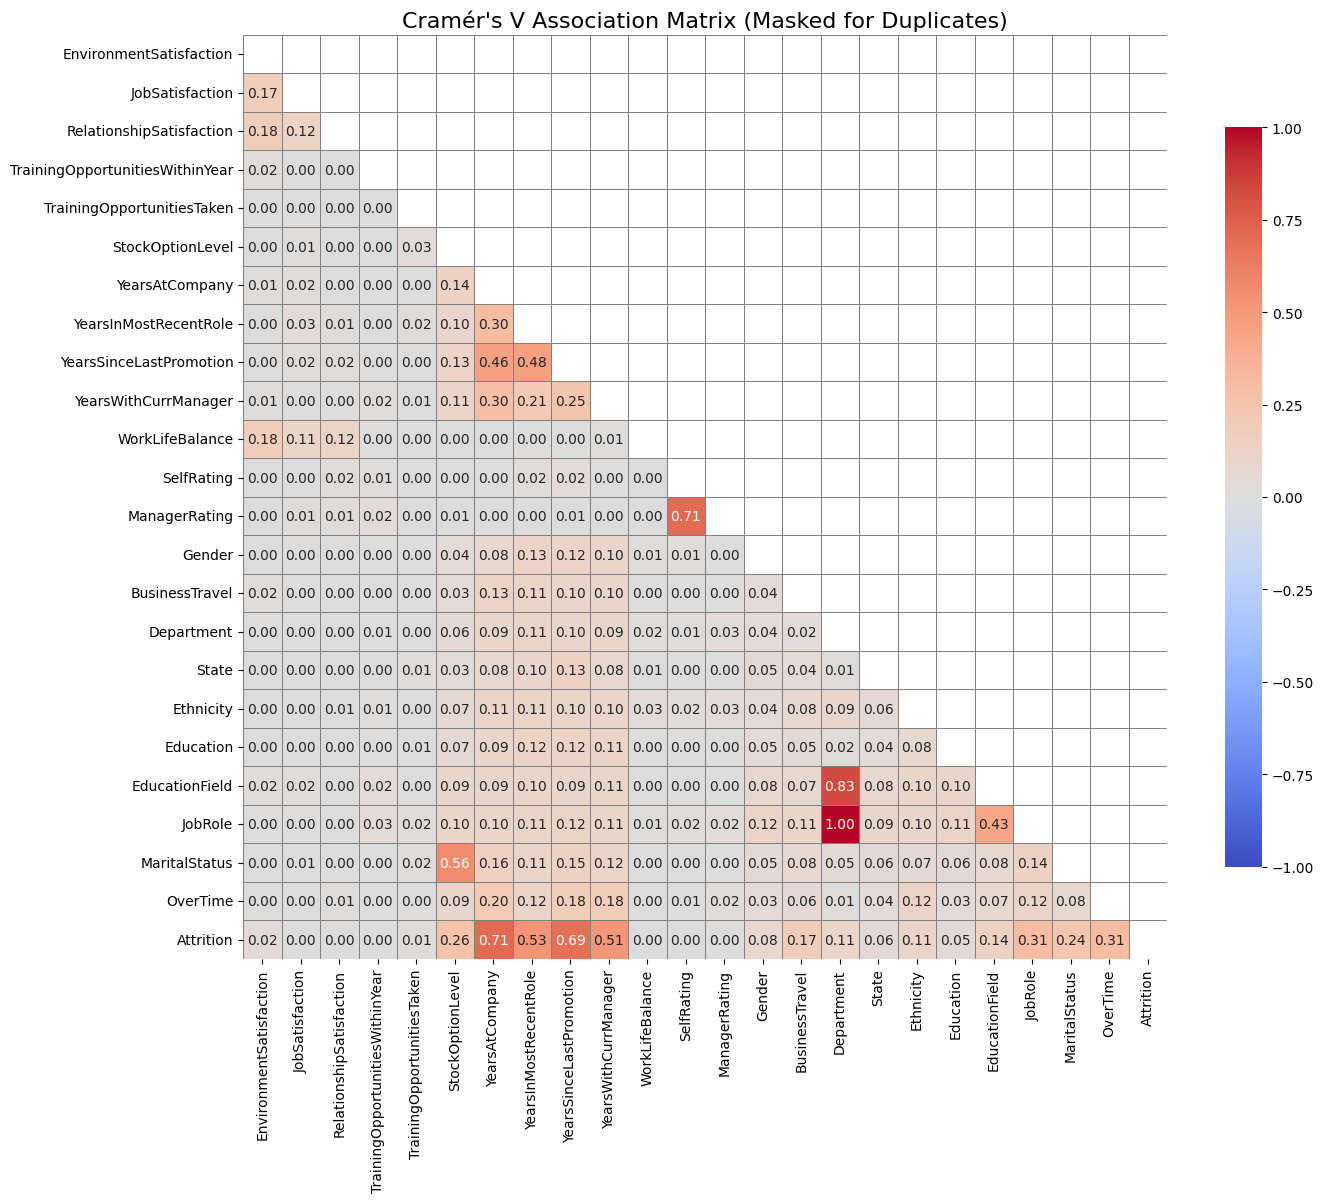

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss

# Sample DataFrame (replace this with your actual DataFrame)
# Assuming processed_df is your DataFrame containing the categorical columns
# processed_df = pd.read_csv('your_data.csv')

# Define the function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# List of categorical columns
categorical_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction',
                    'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken',
                    'StockOptionLevel', 'YearsAtCompany', 'YearsInMostRecentRole',
                    'YearsSinceLastPromotion', 'YearsWithCurrManager', 'WorkLifeBalance',
                    'SelfRating', 'ManagerRating', 'Gender', 'BusinessTravel',
                    'Department', 'State', 'Ethnicity', 'Education',
                    'EducationField', 'JobRole', 'MaritalStatus',
                    'OverTime', 'Attrition']

# Create an association matrix to store Cramér's V values
cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Calculate Cramér's V for each pair of categorical variables
for i in range(len(categorical_cols)):
    for j in range(len(categorical_cols)):
        if i != j:  # Avoid comparing the same variable
            cramers_v_matrix.iloc[i, j] = cramers_v(processed_df[categorical_cols[i]], processed_df[categorical_cols[j]])
        else:
            cramers_v_matrix.iloc[i, j] = 1  # Cramér's V with itself is 1

# Convert the matrix to numeric type
cramers_v_matrix = cramers_v_matrix.astype(float)

# Mask the upper triangle of the matrix to avoid duplication in visualization
mask = np.triu(np.ones_like(cramers_v_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Create the heatmap with the mask and a color palette
sns.heatmap(cramers_v_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            mask=mask,  # Apply the mask to hide the upper triangle
            square=True,
            cbar_kws={"shrink": .8},
            linewidths=.5,  # Add lines between cells
            linecolor='gray',  # Color of the lines
            vmin=-1, vmax=1)  # Set limits for color scale

# Set title
plt.title("Cramér's V Association Matrix (Masked for Duplicates)", fontsize=16)
plt.show()

In [ ]:
# version 2
# remove categorical_cols that are showing similar characteristics as 'Department' variable
# edited_categorical_cols = categorical_cols.remove('JobRole')
# edited_categorical_cols

processed_df = merged_df.drop(['JobRole'], axis=1)
processed_df.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,...,Single,141998,0,Yes,2013-12-14,Yes,5,5,5,1
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,...,Married,58993,1,Yes,2014-11-07,Yes,7,2,7,1
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,...,Married,23547,0,No,2015-01-13,Yes,3,0,2,1
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,...,Divorced,57698,2,Yes,2015-05-11,Yes,6,5,6,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,...,Single,49374,0,Yes,2014-04-02,Yes,1,0,0,1


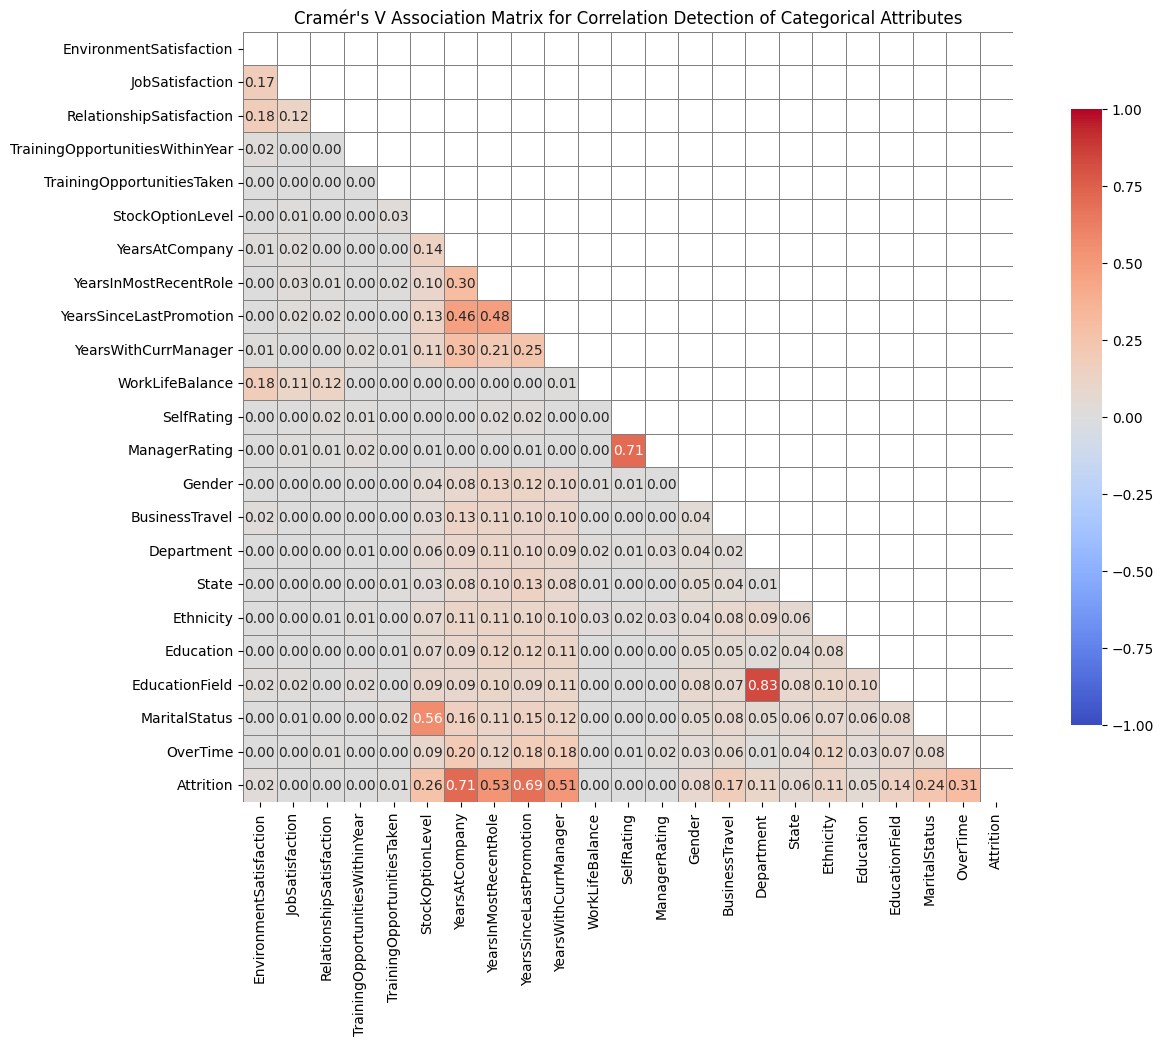

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss

# Sample DataFrame (replace this with your actual DataFrame)
# Assuming processed_df is your DataFrame containing the categorical columns
# processed_df = pd.read_csv('your_data.csv')

# Define the function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# List of categorical columns
edited_categorical_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction',
                    'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken',
                    'StockOptionLevel', 'YearsAtCompany', 'YearsInMostRecentRole',
                    'YearsSinceLastPromotion', 'YearsWithCurrManager', 'WorkLifeBalance',
                    'SelfRating', 'ManagerRating', 'Gender', 'BusinessTravel',
                    'Department', 'State', 'Ethnicity', 'Education',
                    'EducationField', 'MaritalStatus',
                    'OverTime', 'Attrition']

# Create an association matrix to store Cramér's V values
cramers_v_matrix = pd.DataFrame(index=edited_categorical_cols, columns=edited_categorical_cols)

# Calculate Cramér's V for each pair of categorical variables
for i in range(len(edited_categorical_cols)):
    for j in range(len(edited_categorical_cols)):
        if i != j:  # Avoid comparing the same variable
            cramers_v_matrix.iloc[i, j] = cramers_v(processed_df[edited_categorical_cols[i]], processed_df[edited_categorical_cols[j]])
        else:
            cramers_v_matrix.iloc[i, j] = 1  # Cramér's V with itself is 1

# Convert the matrix to numeric type
# cramers_v_matrix = cramers_v_matrix.astype(float)

# Display the association matrix
# cramers_v_matrix

# Convert the matrix to numeric type
cramers_v_matrix = cramers_v_matrix.astype(float)

# Mask the upper triangle of the matrix to avoid duplication in visualization
mask = np.triu(np.ones_like(cramers_v_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create the heatmap with the mask and a color palette
sns.heatmap(cramers_v_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            mask=mask,  # Apply the mask to hide the upper triangle
            square=True,
            cbar_kws={"shrink": .8},
            linewidths=.5,  # Add lines between cells
            linecolor='gray',  # Color of the lines
            vmin=-1, vmax=1)  # Set limits for color scale

# Set title
plt.title("Cramér's V Association Matrix for Correlation Detection of Categorical Attributes", fontsize=12)
plt.show()

In [ ]:
# remove categorical_cols that are showing similar characteristics as 'Department' variable
edited_categorical_cols = categorical_cols.remove('JobRole')
edited_categorical_cols

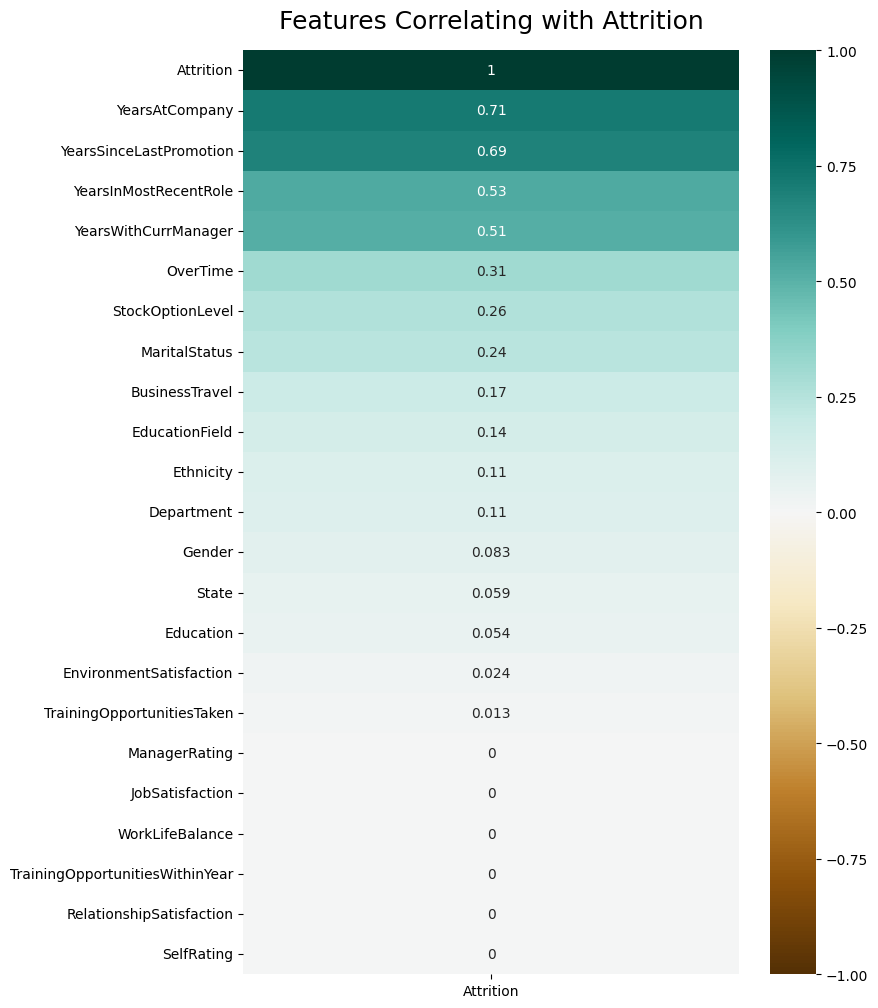

In [ ]:
# prompt: use edited edited_categorical_cols to plot out a single column heatmap using edited_categorical_cols.corr using attrition columns
# ***
# sample code by Bibor Szabo: plt.figure(figsize=(8, 12))heatmap = sns.heatmap(dataframe.corr()[['Sale Price']].sort_values(by='Sale Price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);
# ***

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(cramers_v_matrix[['Attrition']].sort_values(by='Attrition', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Attrition', fontdict={'fontsize':18}, pad=16);